# Movies Data - Exploratory Data Analysis using Python

In [5]:
your_local_path="C:\\Users\\jatsharm\\DataScience\\EDA\\"

Questions to look at:
<b><i>
+ List of movies that are rated most by users
+ In ratings, how to address ratings sparsity problem
+ Plot distributions
+ Identify different age groups and technique of binning
+ Subgrouping and unstacking
+ Differences in ratings by gender
</b></i>

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Pass column names in names for each CSV

# Load the users data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(your_local_path+'u.user', sep='|', names=u_cols,
                    encoding='latin-1')

# Load the ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(your_local_path+'u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols

# Load the movies data
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(your_local_path+'u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [8]:
# Check the structure of Users data
users.shape

(943, 5)

In [9]:
# Check few sample values of user data
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [10]:
# Get information on user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [11]:
# Get data type information of movies data
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [12]:
# Describe the spread of the users data
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [13]:
# Get sample movie ids
movies['movie_id'].head()

0    1
1    2
2    3
3    4
4    5
Name: movie_id, dtype: int64

In [14]:
# Selecting a subset of columns from the movies data
movies[['movie_id','title']].head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
# Another example of subsetting (Putting a condition)
users[users.age<40].tail(10)

,user_id,age,sex,occupation,zip_code
926,927,23,M,programmer,55428
927,928,21,M,student,55408
929,930,28,F,scientist,07310
932,933,28,M,student,48105
935,936,24,M,other,32789
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
942,943,22,M,student,77841


In [16]:
# More conditions
users[(users.age < 40) & (users.sex == 'F')].head(3)

,user_id,age,sex,occupation,zip_code
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405


In [17]:
# Create the index for the users dataset. Can run only once.
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [18]:
# reset the index
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [19]:
# Merge datasets - Movies, ratings & users
#movies.head()    # movie_id
#ratings.head()   # movie_id & user_id
#users.head()     # user_id

movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [20]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [21]:
# Let us answer some simple questions now. 
# Most rated movies

most_rated = lens.groupby('title').size().sort_values(ascending=False)
most_rated

title
Star Wars (1977)                                     583
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                   379
Rock, The (1996)         

In [22]:
# Another way to get the mentions. value_counts: The resulting object will be in descending order so that the first element is the most frequently-occurring 
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [23]:
# Highest rated movies
highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean]})
highest_ratings.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [24]:
# Let us sort the output and see what we get
highest_ratings.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [25]:
# We shall consider movies that have been rated more than 100 times

atleast_100 = highest_ratings['rating']['size'] >= 100
highest_ratings[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [26]:
import matplotlib.pyplot as plt
% matplotlib inline

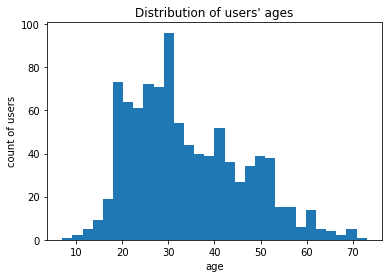

In [27]:
# Lets plot the user age and count

users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [28]:
# How to get the 397 th user's age
lens['age'][397]

21

In [29]:
# Let us create buckets age-wise
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)


In [30]:
# Group these age buckets and check the rating behaviour. Check who has given max & min number of ratings
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [31]:
# Get the top 100 most mentions
most_100 = lens.groupby('movie_id').size().sort_values(ascending=False)[:100]

In [32]:
# Lets set the movie_id as the index
lens.set_index('movie_id', inplace=True)

In [33]:
# Lets split the observations by title and age group
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)  0-9          5.000000
                              10-19        4.100000
                              20-29        3.924731
                              30-39        3.887500
                              40-49        4.093023
                              50-59        4.000000
                              60-69        4.285714
Air Force One (1997)          10-19        3.647059
                              20-29        3.666667
                              30-39        3.570000
                              40-49        3.555556
                              50-59        3.750000
                              60-69        3.666667
                              70-79        3.666667
Aladdin (1992)                10-19        3.840000
Name: rating, dtype: float64

In [34]:
# Make it more presentable using unstack
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.0
Blade Runner (1982),0.0,3.400000,4.134454,4.211765,4.147059,4.136364,4.400000,0.0
"Blues Brothers, The (1980)",0.0,4.214286,4.050505,3.637681,3.795455,3.450000,3.200000,0.0
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.0
Broken Arrow (1996),0.0,3.363636,3.036697,2.938462,3.058824,3.052632,2.400000,0.0
Casablanca (1942),0.0,4.636364,4.447368,4.442857,4.530612,4.344828,4.285714,5.0
Chasing Amy (1997),0.0,4.130435,3.808333,3.679245,3.878788,3.789474,2.857143,0.0
"Clockwork Orange, A (1971)",0.0,4.600000,4.042105,3.688525,3.612903,4.176471,3.714286,0.0
Conspiracy Theory (1997),0.0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.0


In [35]:
# Reset movie_id as index
lens.reset_index('movie_id', inplace=True)

In [36]:
# Let us pivot the data and split observations betweem male and female ratings
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [37]:
# Try to find the rating behaviour difference between male and female
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [38]:
# Reset movie_id as index again
pivoted.reset_index('movie_id', inplace=True)

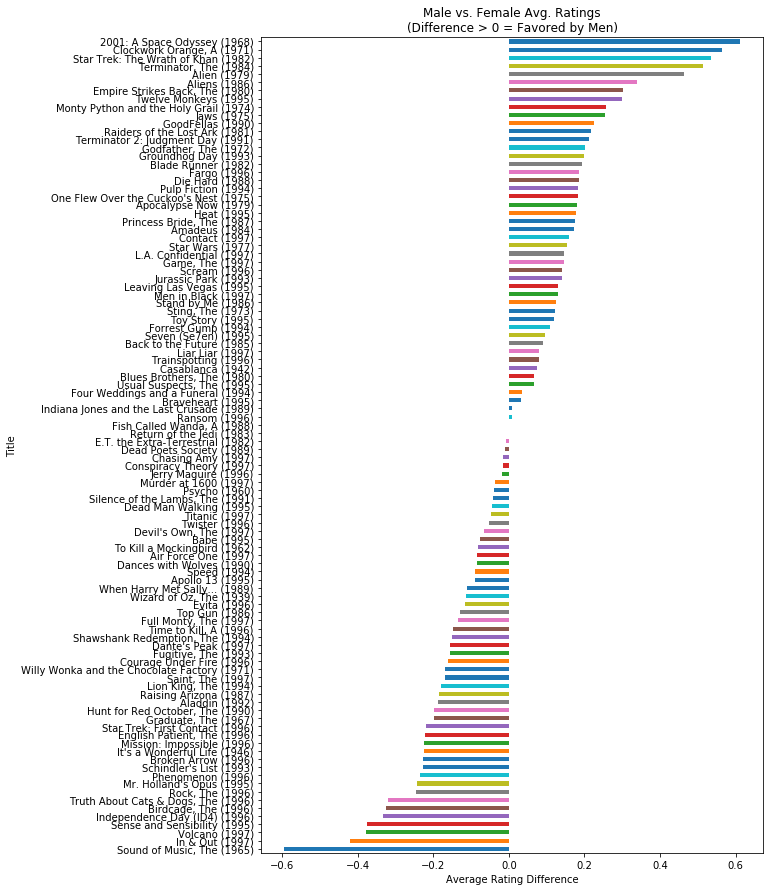

In [39]:
# Let us plot the rating differences between male and female and check for ourselves for patterns
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');